### Importing necessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset:

I used the file named "train.csv" from Titanic Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/train.csv")

### Exploring the Data :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             89
dtype: int64

In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Dropping unuseful columns :

In [6]:
columns_to_drop = ["Name","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df.drop(columns = columns_to_drop, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


### Checking for Duplicates:

In [8]:
duplicates = df.duplicated()
duplicated_rows = df[duplicates]
duplicated_rows.count()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

### Checking for Missing Values :

In [9]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
dtype: int64

Imputing missing values in "Age" column with the mean

In [10]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


## Plotting a histogram to show the distribution of the "Age" Variable :

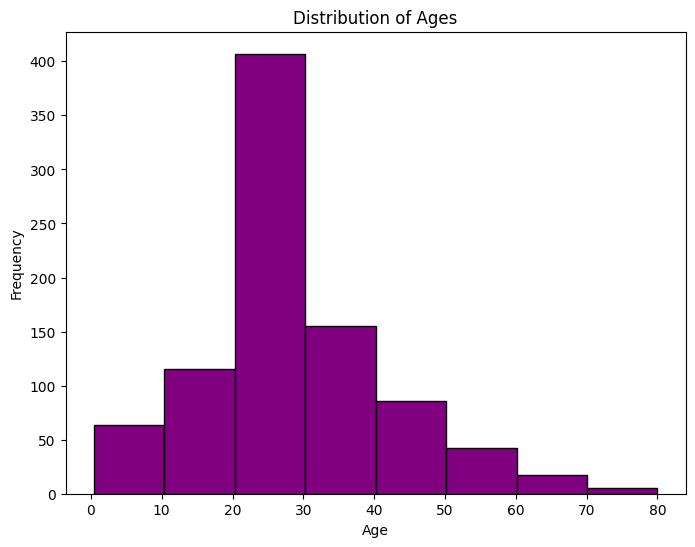

In [12]:

plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=8, color='purple', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Plotting a histogram of the age distribution for each gender side by side.

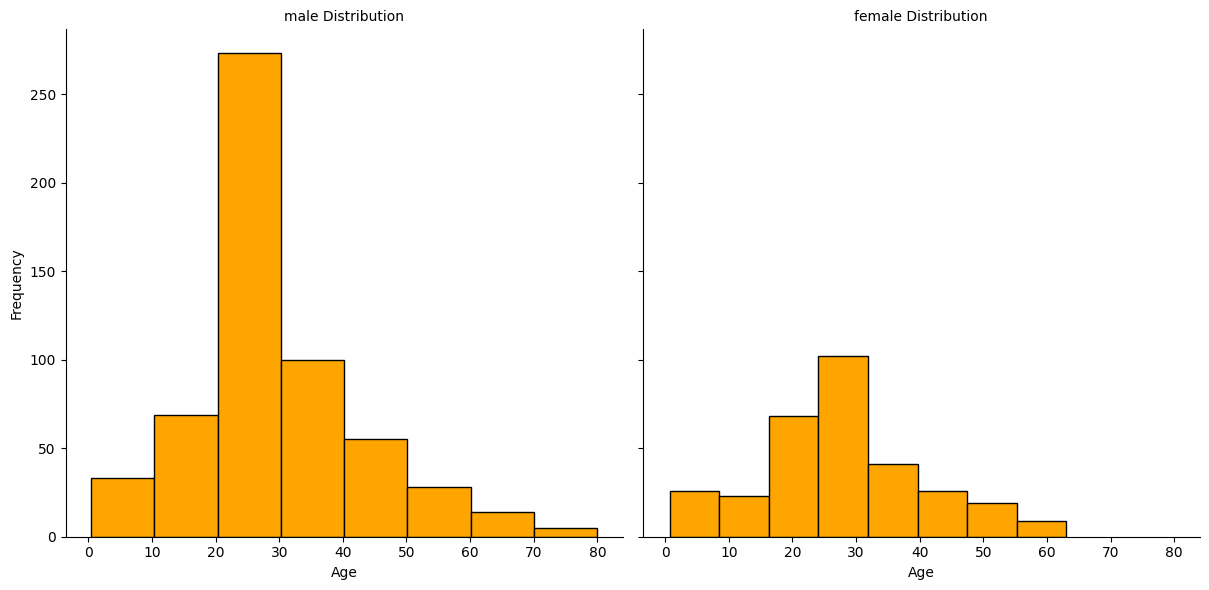

In [13]:
# Create a FacetGrid for a grouped histogram
g = sns.FacetGrid(df, col='Sex', height=6, aspect=1)
g.map(plt.hist, 'Age', bins=8, color='orange', edgecolor='black')

# Add titles and labels
g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template='{col_name} Distribution')
plt.show()

## Comparing the distribution of males and females :

In [14]:
# Count the number of males and females
gender_counts = df['Sex'].value_counts()
gender_counts

male      577
female    314
Name: Sex, dtype: int64

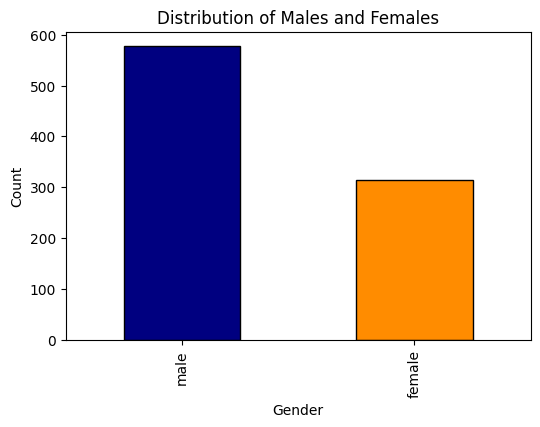

In [15]:
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['navy', 'darkorange'], edgecolor='black')
plt.title('Distribution of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Done by Mosab Al-Abdulrahman @ 20-11-2023